In [42]:
import pandas as pd
from wmfdata import charting, hive
import numpy as np

In [3]:
charting.set_mpl_style()

AttributeError: module 'matplotlib' has no attribute 'style'

# Window opens

In [10]:
window_opens = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.action like "window-open%"
group by 
    to_date(dt),
    event.action
""")

In [13]:
window_opens = (
    window_opens
    .pivot_table(index="date", columns="action")
)

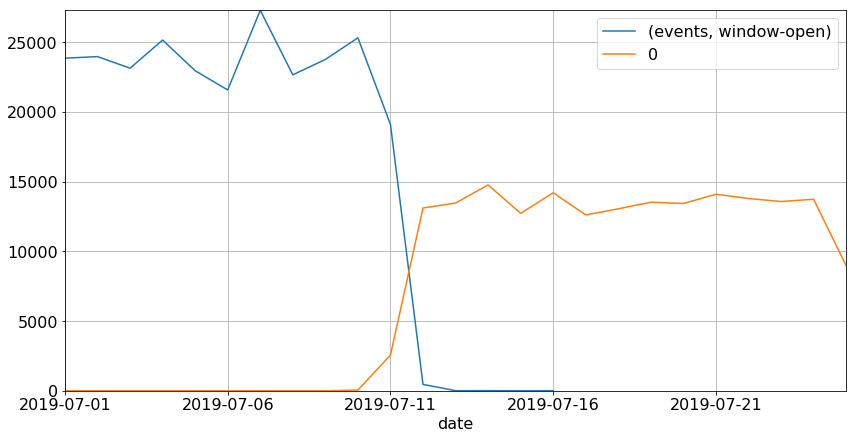

In [24]:
old_window_opens = window_opens.iloc[:, 0]
new_window_opens = window_opens.iloc[:, 1:].sum(axis=1)
pd.concat([old_window_opens, new_window_opens], axis=1).plot()

In [29]:
window_opens_by_platform_r = hive.run("""
select
    to_date(eas.dt) as date,
    eas.event.platform,
    vefu.event.action as action,
    count(*) as events
from event.visualeditorfeatureuse vefu
inner join event.editattemptstep eas
on 
    vefu.event.editingsessionid = eas.event.editing_session_id and
    eas.event.action = "init" and
    vefu.event.action like "window-open%" and
    vefu.year = 2019 and vefu.month = 7 and
    eas.year = 2019 and eas.month = 7
group by 
    to_date(eas.dt),
    eas.event.platform,
    vefu.event.action
""")

In [35]:
(
    window_opens_by_platform_r
    .pivot_table(index="date", columns=["action", "platform"])
    .fillna(0)
    .applymap(int)
)

events                                        \
action     window-open        window-open-from-command         
platform       desktop  phone                  desktop phone   
date                                                           
2019-07-01        6902   1580                        0     0   
2019-07-02        7185   1673                        0     0   
2019-07-03        7234   1851                        0     0   
2019-07-04        7225  14030                        0     0   
2019-07-05        6225  12924                        0     0   
2019-07-06        5260  12187                        0     0   
2019-07-07        5994  15977                        0     0   
2019-07-08        6920  11916                        0     0   
2019-07-09        6889  12526                        0     0   
2019-07-10        7162  14158                        1     0   
2019-07-11        5784  10328                      150    56   
2019-07-12          24     20                      254   430   
2019-07-13           1      2                      384   404   
2019-07-14           7      2                      267   390   
2019-07-15           2      0                      315   375   
2019-07-16           0      1                      330   400   
2019-07-17           0      0                      472   409   
2019-07-18           0      0                      352   321   
2019-07-19           0      0                      612   331   
2019-07-20           0      0                      220   367   
2019-07-21           0      0                      302   398   
2019-07-22           0      0                      276   342   
2019-07-23           0      0                      505   342   
2019-07-24           0      0                      499   357   
2019-07-25           0      0                      310   288   

                                                                           \
action     window-open-from-context       window-open-from-sequence         
platform                    desktop phone                   desktop phone   
date                                                                        
2019-07-01                        0     0                         0     0   
2019-07-02                        0     0                         0     0   
2019-07-03                        0     0                         0     0   
2019-07-04                        0     0                         0     0   
2019-07-05                        0     0                         0     0   
2019-07-06                        0     0                         0     0   
2019-07-07                        0     0                         0     0   
2019-07-08                        0     0                         0     0   
2019-07-09                        0     0                         0     0   
2019-07-10                        5     2                         0     0   
2019-07-11                      126   597                        30    31   
2019-07-12                      898  3709                       229   310   
2019-07-13                      889  3034                       170   245   
2019-07-14                      881  3978                       258   371   
2019-07-15                      996  3115                       186   366   
2019-07-16                      968  2869                       181   340   
2019-07-17                      950  2966                       143   277   
2019-07-18                     1060  2969                       216   264   
2019-07-19                      947  2852                       246   391   
2019-07-20                      797  3362                       122   396   
2019-07-21                      939  3485                       172   325   
2019-07-22                     1121  3791                       132   269   
2019-07-23                     1165  3161                       277   217   
2019-07-24                      993  3039                       188   316   
201

In [38]:
window_opens_by_feature_r = hive.run("""
select
    to_date(dt) as date,
    event.feature as feature,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.action like "window-open%"
group by 
    to_date(dt),
    event.feature
""")

In [46]:
window_opens_by_feature_r.pivot_table(index="date", columns=["feature"]).fillna(0).sort_values("2019-07-01", axis=1, ascending=False)


events                                                       \
feature     mwSave    link transclusion  citoid   cite  media reference   
date                                                                      
2019-07-01  7894.0  6920.0       4939.0  2168.0  539.0  438.0     197.0   
2019-07-02  7713.0  7281.0       4644.0  2246.0  723.0  477.0     277.0   
2019-07-03  7561.0  6992.0       4514.0  2191.0  459.0  421.0     272.0   
2019-07-04  7926.0  7794.0       5204.0  2253.0  500.0  377.0     305.0   
2019-07-05  7535.0  6606.0       4970.0  2106.0  578.0  276.0     278.0   
2019-07-06  7371.0  6125.0       4755.0  1866.0  443.0  249.0     255.0   
2019-07-07  9337.0  7922.0       5869.0  2288.0  580.0  417.0     233.0   
2019-07-08  7505.0  6539.0       4678.0  2074.0  529.0  309.0     277.0   
2019-07-09  7517.0  7534.0       4748.0  2206.0  436.0  396.0     281.0   
2019-07-10  8200.0  7977.0       4687.0  2354.0  574.0  415.0     289.0   
2019-07-11  6151.0  7314.0       4615.0  1727.0  480.0  355.0     314.0   
2019-07-12    20.0  7194.0       5082.0   105.0   44.0  339.0     246.0   
2019-07-13     2.0  7679.0       4836.0     0.0    0.0  324.0     248.0   
2019-07-14     2.0  8326.0       5280.0     0.0    0.0  329.0     298.0   
2019-07-15     1.0  6888.0       4655.0     0.0    0.0  356.0     360.0   
2019-07-16     2.0  8552.0       4519.0     0.0    0.0  350.0     260.0   
2019-07-17     0.0  6950.0       4397.0     0.0    0.0  420.0     309.0   
2019-07-18     0.0  7431.0       4587.0     0.0    0.0  265.0     323.0   
2019-07-19     0.0  7815.0       4476.0     0.0    0.0  458.0     241.0   
2019-07-20     0.0  7653.0       4534.0     0.0    0.0  291.0     382.0   
2019-07-21     0.0  7541.0       5390.0     0.0    0.0  270.0     307.0   
2019-07-22     0.0  7179.0       5286.0     0.0    0.0  326.0     328.0   
2019-07-23     0.0  7646.0       4786.0     0.0    0.0  297.0     251.0   
2019-07-24     0.0  7544.0       4849.0     0.0    0.0  400.0     244.0   
2019-07-25     0.0  7508.0       4820.0     0.0    0.0  352.0     262.0   
2019-07-26     0.0  7660.0       4353.0     0.0    0.0  331.0     224.0   
2019-07-27     0.0  7818.0       4863.0     0.0    0.0  347.0     258.0   
2019-07-28     0.0  7573.0       4782.0     0.0    0.0  300.0     265.0   
2019-07-29     0.0  4958.0       3017.0     0.0    0.0  255.0     200.0   

                                        ...              \
feature      meta wikitextLink gallery  ... score mwPre   
date                                    ...               
2019-07-01  129.0         84.0    78.0  ...   1.0   0.0   
2019-07-02  100.0         38.0    74.0  ...   0.0   1.0   
2019-07-03  135.0         34.0    59.0  ...   1.0   0.0   
2019-07-04  116.0         68.0    77.0  ...   0.0   0.0   
2019-07-05   95.0         31.0    64.0  ...   3.0   0.0   
2019-07-06   91.0         28.0    54.0  ...   2.0   1.0   
2019-07-07  106.0         39.0    58.0  ...   1.0   0.0   
2019-07-08  117.0         29.0    68.0  ...   2.0   0.0   
2019-07-09   96.0         34.0    70.0  ...   0.0   0.0   
2019-07-10   96.0         75.0    55.0  ...   1.0   0.0   
2019-07-11  111.0         61.0    97.0  ...   3.0   2.0   
2019-07-12   71.0        105.0    78.0  ...   1.0   0.0   
2019-07-13   42.0         20.0    85.0  ...   0.0   0.0   
2019-07-14   53.0         96.0    54.0  ...   0.0   0.0   
2019-07-15   92.0         38.0    59.0  ...   2.0   0.0   
2019-07-16   76.0         53.0    63.0  ...   1.0   0.0   
2019-07-17   67.0         37.0    76.0  ...   2.0   0.0   
2019-07-18   71.0         36.0    62.0  ...   0.0   1.0   
2019-07-19   98.0         18.0    55.0  ...   2.0   0.0   
2019-07-20   55.0         56.0    93.0  ...   0.0   0.0   
2019-07-21   76.0         40.0    89.0  ...   2.0   0.0   
2019-07-22   81.0         74.0    98.0  ...   0.0   0.0   
2019-07-23   64.0         62.0    95.0  ...   0.0   0.0   
2019-07-24  101.0         54.0    63.0  ...   0.0   5.0   
2019-07-25   77.0 

# Dialog events

In [25]:
dialog_events = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.action like "dialog%"
group by 
    to_date(dt),
    event.action
""").pivot_table(index="date", columns="action")

In [60]:
dialog_events.fillna(0)

events                                         
action     dialog-abort dialog-convert dialog-done dialog-remove
date                                                            
2019-07-10         13.0            0.0        32.0           0.0
2019-07-11        769.0            3.0      1146.0           0.0
2019-07-12       3486.0           19.0      5161.0           2.0
2019-07-13       3584.0           10.0      5863.0           8.0
2019-07-14       3863.0           10.0      6232.0          12.0
2019-07-15       3693.0           12.0      5087.0          14.0
2019-07-16       4079.0           14.0      6487.0          31.0
2019-07-17       3639.0            5.0      5188.0          19.0
2019-07-18       4050.0            7.0      5485.0           8.0
2019-07-19       3789.0            8.0      5806.0          31.0
2019-07-20       3518.0            5.0      5812.0          31.0
2019-07-21       3984.0            7.0      5576.0          13.0
2019-07-22       3845.0            5.0      5390.0           6.0
2019-07-23       3795.0            8.0      5833.0           6.0
2019-07-24       3868.0           10.0      5786.0           8.0
2019-07-25       2466.0            6.0      3983.0           7.0

# Context events

In [37]:
context_events = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.action like "context%"
group by 
    to_date(dt),
    event.action
""").pivot_table(index="date", columns="action")

In [59]:
context_events.fillna(0)

events                                          
action     context-clear context-delete context-label context-show
date                                                              
2019-07-10           7.0           15.0           0.0        126.0
2019-07-11         253.0          309.0          10.0      13726.0
2019-07-12        1251.0         1937.0          97.0      75965.0
2019-07-13        2233.0         2223.0          47.0      75380.0
2019-07-14         873.0         1277.0          89.0      82460.0
2019-07-15        1129.0         1639.0          91.0      74844.0
2019-07-16        1632.0         2456.0         118.0      82762.0
2019-07-17         810.0         1381.0          71.0      69179.0
2019-07-18        1368.0         1337.0          93.0      74481.0
2019-07-19        1091.0         1167.0          85.0      73857.0
2019-07-20        1109.0         1243.0          91.0      76822.0
2019-07-21         895.0         1397.0          74.0      76003.0
2019-07-22        1460.0         1256.0         101.0      76706.0
2019-07-23        1455.0         1138.0          87.0      81642.0
2019-07-24         935.0          948.0          89.0      76595.0
2019-07-25         859.0         1040.0         102.0      72893.0
2019-07-26         962.0         1047.0          54.0      72568.0
2019-07-27        1103.0         1295.0          48.0      74801.0
2019-07-28        1144.0         1441.0         164.0      76470.0
2019-07-29         561.0          819.0          80.0      47413.0

# Link events

In [47]:
link_events = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.feature like "link%"
group by 
    to_date(dt),
    event.action
""").pivot_table(index="date", columns="action")

In [58]:
link_events.fillna(0)

events                                                          \
action       clear context-clear context-delete context-label context-show   
date                                                                         
2019-07-01   677.0           0.0            0.0           0.0          0.0   
2019-07-02  1130.0           0.0            0.0           0.0          0.0   
2019-07-03   720.0           0.0            0.0           0.0          0.0   
2019-07-04   774.0           0.0            0.0           0.0          0.0   
2019-07-05  2313.0           0.0            0.0           0.0          0.0   
2019-07-06  2064.0           0.0            0.0           0.0          0.0   
2019-07-07  1361.0           0.0            0.0           0.0          0.0   
2019-07-08  4319.0           0.0            0.0           0.0          0.0   
2019-07-09  1063.0           0.0            0.0           0.0          0.0   
2019-07-10   742.0           7.0            0.0           0.0         65.0   
2019-07-11   603.0         251.0            3.0          10.0       8866.0   
2019-07-12     3.0        1184.0           13.0          97.0      46162.0   
2019-07-13     1.0        2207.0           21.0          47.0      47943.0   
2019-07-14     0.0         832.0           30.0          89.0      55025.0   
2019-07-15     0.0        1105.0           29.0          91.0      44237.0   
2019-07-16     0.0        1571.0           38.0         118.0      53534.0   
2019-07-17     0.0         779.0           27.0          71.0      41620.0   
2019-07-18     0.0        1358.0           22.0          93.0      45015.0   
2019-07-19     0.0        1062.0           15.0          85.0      47188.0   
2019-07-20     0.0         987.0           25.0          91.0      50089.0   
2019-07-21     0.0         859.0           29.0          74.0      48378.0   
2019-07-22     0.0        1306.0           18.0         101.0      47572.0   
2019-07-23     0.0        1404.0           46.0          87.0      53679.0   
2019-07-24     0.0         905.0           27.0          89.0      44663.0   
2019-07-25     0.0         851.0           25.0         102.0      48511.0   
2019-07-26     0.0         947.0           14.0          54.0      46103.0   
2019-07-27     0.0        1094.0           34.0          48.0      46628.0   
2019-07-28     0.0        1108.0           23.0         164.0      46689.0   
2019-07-29     0.0         535.0           15.0          80.0      28606.0   

                                                                        \
action     dialog-abort dialog-convert dialog-done external-link-input   
date                                                                     
2019-07-01          0.0            0.0         0.0                 0.0   
2019-07-02          0.0            0.0         0.0                 0.0   
2019-07-03          0.0            0.0         0.0                 0.0   
2019-07-04          0.0            0.0         0.0                 0.0   
2019-07-05          0.0            0.0         0.0                 0.0   
2019-07-06          0.0            0.0         0.0                 0.0   
2019-07-07          0.0            0.0         0.0                 0.0   
2019-07-08          0.0            0.0         0.0                 0.0   
2019-07-09          0.0            0.0         0.0                 0.0   
2019-07-10         13.0            0.0        31.0                 8.0   
2019-07-11        321.0            3.0      1110.0                56.0   
2019-07-12       1652.0           19.0      5001.0               405.0   
2019-07-13       1620.0           10.0      5782.0               823.0   
2019-07-14       1878.0           10.0      6084.0               358.0   
2019-07-15       1634.0           12.0      5001.0               326.0   
2019-07-16       1918.0           14.0      6375.0               827.0   
2019-07-17       1607.0            5.0      5084.0               812.0   
2019-07-18       1796.0            

# Citoid events

In [49]:
citoid_events = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.feature = "citoid"
group by 
    to_date(dt),
    event.action
""").pivot_table(index="date", columns="action")

In [57]:
citoid_events.fillna(0)

events                                              \
action     automatic-generate automatic-insert dialog-abort manual-choose   
date                                                                        
2019-07-01                0.0              0.0          0.0           0.0   
2019-07-02                0.0              0.0          0.0           0.0   
2019-07-03                0.0              0.0          0.0           0.0   
2019-07-04                0.0              0.0          0.0           0.0   
2019-07-05                0.0              0.0          0.0           0.0   
2019-07-06                0.0              0.0          0.0           0.0   
2019-07-07                0.0              0.0          0.0           0.0   
2019-07-08                0.0              0.0          0.0           0.0   
2019-07-09                0.0              0.0          0.0           0.0   
2019-07-10                0.0              0.0          0.0           0.0   
2019-07-11              225.0            170.0        423.0          55.0   
2019-07-12              801.0            631.0       1763.0         331.0   
2019-07-13              786.0            662.0       1917.0         407.0   
2019-07-14              726.0            606.0       1889.0         368.0   
2019-07-15              782.0            645.0       1993.0         510.0   
2019-07-16              954.0            812.0       2100.0         380.0   
2019-07-17              873.0            728.0       1967.0         320.0   
2019-07-18              988.0            850.0       2194.0         464.0   
2019-07-19              762.0            638.0       1882.0         389.0   
2019-07-20              715.0            615.0       1691.0         332.0   
2019-07-21              932.0            795.0       2101.0         427.0   
2019-07-22             1044.0            859.0       2091.0         343.0   
2019-07-23              951.0            807.0       2096.0         394.0   
2019-07-24              992.0            872.0       2115.0         378.0   
2019-07-25              811.0            681.0       1912.0         416.0   
2019-07-26              945.0            776.0       1975.0         382.0   
2019-07-27              811.0            722.0       1919.0         372.0   
2019-07-28              786.0            683.0       1997.0         495.0   
2019-07-29              591.0            484.0       1369.0         321.0   

                                                  
action     panel-switch reuse-choose window-open  
date                                              
2019-07-01          0.0          0.0      2168.0  
2019-07-02          0.0          0.0      2246.0  
2019-07-03          0.0          0.0      2191.0  
2019-07-04          0.0          0.0      2253.0  
2019-07-05          0.0          0.0      2106.0  
2019-07-06          0.0          0.0      1866.0  
2019-07-07          0.0          0.0      2288.0  
2019-07-08          0.0          0.0      2074.0  
2019-07-09          0.0          0.0      2206.0  
2019-07-10          0.0          0.0      2354.0  
2019-07-11        293.0         40.0      1727.0  
2019-07-12       1336.0         90.0       105.0  
2019-07-13       1434.0        112.0         0.0  
2019-07-14       1421.0        116.0         0.0  
2019-07-15       1436.0        105.0         0.0  
2019-07-16       1660.0        165.0         0.0  
2019-07-17       1501.0        132.0         0.0  
2019-07-18       1692.0        118.0         0.0  
2019-07-19       1439.0        147.0         0.0  
2019-07-20       1230.0         80.0         0.0  
2019-07-21       1585.0        104.0         0.0  
2019-07-22       1730.0        136.0         0.0  
2019-07-23       1572.0        155.0         0.0  
2019-07-24       1564.0        144.0         0.0  
2019-07-25       1401.0        147.0         0.0  
2019-07-26       1528.0        135.0         0.0  
2019-07-27       1517.0        123.0         0.0  
2019-07-28       1586.0     

In [61]:
_57.sum(axis=1)

date
2019-07-01    2168.0
2019-07-02    2246.0
2019-07-03    2191.0
2019-07-04    2253.0
2019-07-05    2106.0
2019-07-06    1866.0
2019-07-07    2288.0
2019-07-08    2074.0
2019-07-09    2206.0
2019-07-10    2354.0
2019-07-11    2933.0
2019-07-12    5057.0
2019-07-13    5318.0
2019-07-14    5126.0
2019-07-15    5471.0
2019-07-16    6071.0
2019-07-17    5521.0
2019-07-18    6306.0
2019-07-19    5257.0
2019-07-20    4663.0
2019-07-21    5944.0
2019-07-22    6203.0
2019-07-23    5975.0
2019-07-24    6065.0
2019-07-25    5368.0
2019-07-26    5741.0
2019-07-27    5464.0
2019-07-28    5685.0
2019-07-29    3842.0
dtype: float64

# Cite events

In [51]:
cite_events = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.feature = "cite"
group by 
    to_date(dt),
    event.action
""").pivot_table(index="date", columns="action")

In [56]:
cite_events.fillna(0)

events            
action     manual-template-input window-open
date                                        
2019-07-01                   0.0       539.0
2019-07-02                   0.0       723.0
2019-07-03                   0.0       459.0
2019-07-04                   0.0       500.0
2019-07-05                   0.0       578.0
2019-07-06                   0.0       443.0
2019-07-07                   0.0       580.0
2019-07-08                   0.0       529.0
2019-07-09                   0.0       436.0
2019-07-10                   0.0       574.0
2019-07-11                   0.0       480.0
2019-07-12                   0.0        44.0
2019-07-25                 192.0         0.0
2019-07-26                 324.0         0.0
2019-07-27                 276.0         0.0
2019-07-28                 431.0         0.0
2019-07-29                 240.0         0.0

# Reference events

In [53]:
reference_events = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 7 and
    event.feature = "reference"
group by 
    to_date(dt),
    event.action
""").pivot_table(index="date", columns="action")

In [55]:
reference_events.fillna(0)

events                                               \
action     context-delete context-show  input reuse-choose window-open   
date                                                                     
2019-07-01            0.0          0.0    0.0          0.0       197.0   
2019-07-02            0.0          0.0    0.0          0.0       277.0   
2019-07-03            0.0          0.0    0.0          0.0       272.0   
2019-07-04            0.0          0.0    0.0          0.0       305.0   
2019-07-05            0.0          0.0    0.0          0.0       278.0   
2019-07-06            0.0          0.0    0.0          0.0       255.0   
2019-07-07            0.0          0.0    0.0          0.0       233.0   
2019-07-08            0.0          0.0    0.0          0.0       277.0   
2019-07-09            0.0          0.0    0.0          0.0       281.0   
2019-07-10            0.0          0.0    0.0          0.0       289.0   
2019-07-11           16.0        140.0   15.0          0.0       273.0   
2019-07-12          157.0        836.0  154.0          1.0         2.0   
2019-07-13          425.0       1279.0  156.0          0.0         0.0   
2019-07-14          117.0        913.0  198.0          4.0         0.0   
2019-07-15          206.0       1138.0  250.0          2.0         0.0   
2019-07-16          441.0       1089.0  153.0          4.0         0.0   
2019-07-17          190.0        976.0  214.0          2.0         0.0   
2019-07-18          161.0       1126.0  217.0          7.0         0.0   
2019-07-19          107.0        802.0  153.0         11.0         0.0   
2019-07-20          157.0       1312.0  228.0          1.0         0.0   
2019-07-21          105.0       1031.0  206.0          1.0         0.0   
2019-07-22          145.0       1259.0  208.0          1.0         0.0   
2019-07-23          141.0        895.0  173.0          4.0         0.0   
2019-07-24           68.0        851.0  137.0         17.0         0.0   
2019-07-25           87.0        776.0  162.0          3.0         0.0   
2019-07-26          100.0        853.0  148.0          3.0         0.0   
2019-07-27          101.0        926.0  171.0          1.0         0.0   
2019-07-28          135.0        970.0  164.0          4.0         0.0   
2019-07-29           73.0        619.0  153.0          0.0         0.0   

                                                              \
action     window-open-from-command window-open-from-context   
date                                                           
2019-07-01                      0.0                      0.0   
2019-07-02                      0.0                      0.0   
2019-07-03                      0.0                      0.0   
2019-07-04                      0.0                      0.0   
2019-07-05                      0.0                      0.0   
2019-07-06                      0.0                      0.0   
2019-07-07                      0.0                      0.0   
2019-07-08                      0.0                      0.0   
2019-07-09                      0.0                      0.0   
2019-07-10                      0.0                      0.0   
2019-07-11                     16.0                      9.0   
2019-07-12                     90.0                    111.0   
2019-07-13                    104.0                    102.0   
2019-07-14                     92.0                    118.0   
2019-07-15                    175.0                    130.0   
2019-07-16                     96.0                    117.0   
2019-07-17                     88.0                    154.0   
2019-07-18                    106.0                    133.0   
2019-07-19                     91.0                     80.0   
2019-07-20                    120.0                    219.0   
2019-07-21                    126.0                    143.0   
2019-07-22                    141.0                    138.0   
2019-07-23                     93.0               

In [62]:
_55.sum(axis=1)

date
2019-07-01     197.0
2019-07-02     277.0
2019-07-03     272.0
2019-07-04     305.0
2019-07-05     278.0
2019-07-06     255.0
2019-07-07     233.0
2019-07-08     277.0
2019-07-09     281.0
2019-07-10     289.0
2019-07-11     485.0
2019-07-12    1394.0
2019-07-13    2108.0
2019-07-14    1530.0
2019-07-15    1956.0
2019-07-16    1947.0
2019-07-17    1691.0
2019-07-18    1834.0
2019-07-19    1314.0
2019-07-20    2080.0
2019-07-21    1650.0
2019-07-22    1941.0
2019-07-23    1464.0
2019-07-24    1317.0
2019-07-25    1290.0
2019-07-26    1328.0
2019-07-27    1457.0
2019-07-28    1538.0
2019-07-29    1056.0
dtype: float64

# Context item closes 

In [4]:
context_item_closes = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    event.feature as feature,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and ((month = 7 and day > 24) or month = 8) and
    event.action like "context-close%"
group by 
    to_date(dt),
    event.action,
    event.feature
""")

In [6]:
context_item_closes = (
    context_item_closes
    .pivot_table(index="date", columns= ["action", "feature"])
)

In [8]:
context_item_closes.head()

events                                                \
action      context-close                                                 
feature    cite-Literatur cite-Webseite cite-any cite-book cite-journal   
date                                                                      
2019-07-31            NaN           NaN      NaN       NaN          NaN   
2019-08-01            NaN           NaN      NaN       1.0          1.0   
2019-08-02            NaN           6.0      1.0      16.0          3.0   
2019-08-03            NaN          10.0      NaN      10.0          6.0   
2019-08-04            NaN           2.0      NaN      27.0          9.0   

                                                                           \
action                                                                      
feature    cite-news cite-online-book cite-online-news cite-web cite-מאמר   
date                                                                        
2019-07-31       NaN              NaN              NaN      NaN       NaN   
2019-08-01       4.0              NaN              NaN     11.0       NaN   
2019-08-02      15.0              NaN              1.0    110.0       NaN   
2019-08-03      16.0              NaN              NaN    100.0       NaN   
2019-08-04      22.0              NaN              NaN    115.0       NaN   

              ...                                                       \
action        ...                                                        
feature       ...    link/mwNumberedExternal math mergeCells mwGallery   
date          ...                                                        
2019-07-31    ...                        NaN  NaN        2.0       NaN   
2019-08-01    ...                        7.0  NaN        9.0       NaN   
2019-08-02    ...                       19.0  NaN      102.0      10.0   
2019-08-03    ...                        7.0  NaN      109.0      21.0   
2019-08-04    ...                        9.0  NaN       91.0      12.0   

                                                                            \
action                                                                       
feature    mwLanguageVariant mwMedia reference referencesList transclusion   
date                                                                         
2019-07-31               NaN     NaN       NaN            NaN          NaN   
2019-08-01               NaN     2.0       7.0            3.0        216.0   
2019-08-02               NaN    45.0      77.0           49.0       1628.0   
2019-08-03               NaN    53.0      60.0           48.0       1653.0   
2019-08-04               NaN    71.0      75.0           42.0       1610.0   

                      
action                
feature    undefined  
date                  
2019-07-31       NaN  
2019-08-01       NaN  
2019-08-02       NaN  
2019-08-03       NaN  
2019-08-04       NaN  

[5 rows x 25 columns]

## Context item closes by day

In [18]:
context_item_closes.sum(axis = 1)

date
2019-07-31       2.0
2019-08-01     390.0
2019-08-02    3112.0
2019-08-03    3096.0
2019-08-04    3279.0
2019-08-05    3110.0
2019-08-06    3107.0
2019-08-07    3181.0
2019-08-08    3138.0
2019-08-09    3236.0
2019-08-10    3584.0
2019-08-11    3464.0
2019-08-12    3325.0
2019-08-13    3407.0
2019-08-14    3136.0
2019-08-15    3062.0
2019-08-16    3374.0
2019-08-17    3506.0
2019-08-18    3152.0
2019-08-19    3331.0
2019-08-20    3223.0
2019-08-21    1873.0
dtype: float64

Events start recording at the end of July as expected and then increase to about 3000 events per day

## Context item close events by feature

In [19]:
context_item_closes.sum(axis = 0).sort_values(ascending = False)

        action         feature                
events  context-close  transclusion               32470.0
                       link/internal              19600.0
                       mergeCells                  2794.0
                       cite-web                    2154.0
                       reference                   1566.0
                       mwMedia                     1215.0
                       link                        1156.0
                       referencesList              1068.0
                       comment                      395.0
                       link/mwNumberedExternal      343.0
                       cite-book                    301.0
                       cite-news                    282.0
                       cite-journal                 239.0
                       mwGallery                    217.0
                       cite-Webseite                110.0
                       language                      76.0
                       ci

# Text Field Actions/Link Label Editing

**Additional Instrumentation**
Event logged when a contributor types text into the "Text" field within "Wikipedia" or "External site" panel/tab.

**Deploy Date**
September 3, 2019

How events are logged:
* In Wikipedia tab,  event is logged as “mf.schemaVisualEditorFeatureUse {feature: "link", action: "label-input", editingSessionId: "3ebbdab6654964ecf400"}”
* In External site tab, event is logged as “mf.schemaVisualEditorFeatureUse {feature: "link", action: "label-input", editingSessionId: "2d4716ebc90b683d2bfd"}”


In [67]:
label_input_events = hive.run("""
select
    to_date(dt) as date,
    event.action as action,
    event.feature as feature,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and month = 9 and
    event.action like "label-input%"
group by 
    to_date(dt),
    event.action,
    event.feature
""")

In [69]:
label_input_events = (
    label_input_events
    .pivot_table(index="date", columns= ["action", "feature"])
)

In [70]:
label_input_events.head(20)

,events
action,label-input
feature,link
date,
2019-09-11,20
2019-09-12,45
2019-09-13,36
2019-09-14,48
2019-09-15,35
2019-09-16,278
2019-09-17,628


Events started appearing around September 11th. All events are recorded for links as expected. Starting on September 16th, the number of events increases to 278.

## Label input event total

In [71]:
label_input_events.sum(axis = 0).sort_values(ascending = False)

        action       feature
events  label-input  link       4483
dtype: int64

As of September 23rd, a total of 4483 label-input events have been logged since deployment date.

## Label input by platform

In [13]:
label_input_events_by_platform = hive.run("""
select
    to_date(eas.dt) as date,
    eas.event.platform,
    vefu.event.action as action,
    count(*) as events
from event.visualeditorfeatureuse vefu
inner join event.editattemptstep eas
on 
    vefu.event.editingsessionid = eas.event.editing_session_id and
    vefu.event.action like "label-input%" and
    vefu.year = 2019 and vefu.month = 9 and
    eas.year = 2019 and eas.month = 9
group by 
    to_date(eas.dt),
    eas.event.platform,
    vefu.event.action
""")

In [14]:
label_input_events_by_platform.head()

,date,platform,action,events
0,2019-09-11,phone,label-input,43
1,2019-09-12,phone,label-input,157
2,2019-09-13,phone,label-input,89
3,2019-09-14,phone,label-input,124
4,2019-09-15,phone,label-input,121


Confirmed events are recorded only for mobile for this feature.

## Label input by wiki

In [65]:
label_input_events_by_wiki = hive.run("""
select
    wiki,
    count(*) as events
from event.visualeditorfeatureuse
where
    year = 2019 and ((month = 8 and day > 24) or month = 9) and
    event.action like "label-input%"
group by 
    wiki
ORDER BY events DESC LIMIT 50
""")

In [66]:
# Top 10 wikis with label input events recorded. 
label_input_events_by_wiki.head(10)

,wiki,events
0,enwiki,1368
1,eswiki,326
2,ptwiki,246
3,fawiki,211
4,commonswiki,188
5,arwiki,156
6,itwiki,150
7,frwiki,140
8,idwiki,137
9,jawiki,120
